In [1]:
using StatsBase, IterTools, DataFrames, JLD2, LaTeXStrings
using Measures


In [2]:
@load "data/multi-out2.jld2"
σs = [ 0.02, 0.04, 0.06, 0.1, 0.14]

testdf2 = DataFrame(σ = σs,
                    n1 = test_results[1] |>collect,
                    n5 = test_results[2] |> collect,
                    n10 = test_results[3] |> collect, n20 =test_results[4] |> collect);

  likely near In[33]:17


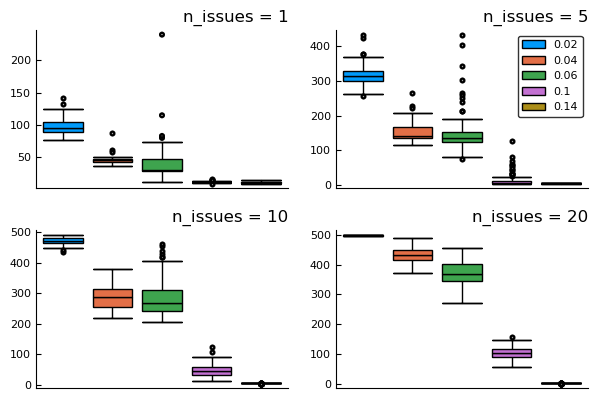

In [33]:
using StatPlots
pyplot()

fig1 = plot(show = false)
fig2 = plot(show = false)
fig3 = plot(show = false)
fig4 = plot(show = false)

@df testdf2 boxplot!(fig1,:n1, legend=false, xticks = nothing, title = "n_issues = 1"
    ,grid = false)
@df testdf2 boxplot!(fig2,:n5, legend=:outertopright, label = reshape(σs,1,:),
    xticks = nothing, title = "n_issues = 5",  grid = false)
@df testdf2 boxplot!(fig3,:n10, legend=false, xticks = nothing, title = "n_issues = 10", grid = false)
@df testdf2 boxplot!(fig4,:n20, legend=false, xticks = nothing, title = "n_issues = 20", grid = false)


finalfig = plot(fig1,fig2,fig3, fig4,
    margin = 3mm, title_location = :right,
    titlefont =Plots.Font("sans-serif",12,:hcenter,:vcenter,0.0,RGB{U8}(0.0,0.0,0.0)),
    marker = (:hexagon,1.5, 0.7, :grey, stroke(3, 0.2, :black, :dot)))

In [34]:
savefig("image/testbox3.svg")

In [6]:
#=import Seaborn
const sns = Seaborn
import PyPlot
const plt = PyPlot

function test_plot()
    display(sns.boxplot(testdf2[:n1]))
    plt.savefig("image/testplot.svg")
end

test_plot()
=#
